## ML Project Steps: 

1. Take big picture view of the problem
2. Data processing
3. Feature engineering
4. Model training and measurement

## 1. Take big picture view of the problem

In [1]:
import numpy as np
import pandas as pd
import os
# to make this notebook's output identical at every run
np.random.seed(42)
# import warnings
# warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

##### We load open-source data from SF MLS historical database.

In [2]:
df = pd.read_csv('Sales.csv')
df.head(10)

,longitude,latitude,elevation,full_address,city,state,street_no,street_name,street_suffix,zip,...,orig_list_price,sale_date,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
0,-122.509650,37.780280,200.83,"2645 El Camino Del Mar, San Francisco, CA 94121",San Francisco,CA,2645,El Camino Del Mar,NaN,94121,...,1095000,3/22/2013,1260000,8,3.5,4,NaN,0,1969,2
1,-122.509290,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,CA,1278,La Playa,St,94122,...,1250000,4/25/2016,1075000,9,3.0,4,0.0689,3000,1947,1
2,-122.509290,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,CA,1278,La Playa,St,94122,...,1395000,8/17/2017,1525000,9,5.0,5,0.0689,3000,1947,1
3,-122.509240,37.777330,189.11,"590 48th Ave, San Francisco, CA 94121",San Francisco,CA,590,48th,Ave,94121,...,725000,8/20/2010,715000,5,1.0,2,NaN,0,1939,2
4,-122.509190,37.776695,175.89,"618 48th Ave, San Francisco, CA 94121",San Francisco,CA,618,48th,Ave,94121,...,1595000,7/13/2012,1595000,8,4.0,4,NaN,0,1951,3
5,-122.509190,37.776695,175.89,"618 48th Ave, San Francisco, CA 94121-2410",San Francisco,CA,618,48th,Ave,94121,...,2749000,6/21/2018,3310000,8,4.0,4,0.0909,3959,1951,3
6,-122.509186,37.761005,23.69,"1362 La Playa St, San Francisco, CA 94122-1019",San Francisco,CA,1362,La Playa,St,94122,...,600000,5/19/2009,530000,0,1.0,3,NaN,0,1947,2
7,-122.509090,37.759580,23.45,"1434 La Playa St, San Francisco, CA 94122",San Francisco,CA,1434,La Playa,St,94122,...,1595000,11/28/2018,1304000,0,2.0,3,0.0606,2639,1900,1
8,-122.509080,37.759480,23.57,"1440 La Playa St, San Francisco, CA 94122",San Francisco,CA,1440,La Playa,St,94122,...,998000,12/16/2015,1303000,5,2.0,3,0.0688,2996,1900,1
9,-122.509056,37.758010,23.01,"1516 Great Highway, San Francisco, CA 94122",San Francisco,CA,1516,Great Highway,NaN,94122,...,1298000,5/23/2018,1830000,7,3.0,4,0.0705,3072,1948,1


 Seems like we cannot see all the columns, so we need to do some tricks here:

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,longitude,latitude,elevation,full_address,city,state,street_no,street_name,street_suffix,zip,area,district_no,district_desc,subdist_no,subdist_desc,on_market_date,cdom,orig_list_price,sale_date,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
0,-122.50965,37.780280,200.83,"2645 El Camino Del Mar, San Francisco, CA 94121",San Francisco,CA,2645,El Camino Del Mar,NaN,94121,1050,1,SF District 1,1050,1 - Outer Richmond,3/14/2013,4,1095000,3/22/2013,1260000,8,3.5,4,NaN,0,1969,2
1,-122.50929,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,CA,1278,La Playa,St,94122,2030,2,SF District 2,2030,2 - Outer Sunset,12/3/2015,144,1250000,4/25/2016,1075000,9,3.0,4,0.0689,3000,1947,1
2,-122.50929,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,CA,1278,La Playa,St,94122,2030,2,SF District 2,2030,2 - Outer Sunset,5/18/2017,36,1395000,8/17/2017,1525000,9,5.0,5,0.0689,3000,1947,1
3,-122.50924,37.777330,189.11,"590 48th Ave, San Francisco, CA 94121",San Francisco,CA,590,48th,Ave,94121,1050,1,SF District 1,1050,1 - Outer Richmond,6/27/2010,42,725000,8/20/2010,715000,5,1.0,2,NaN,0,1939,2
4,-122.50919,37.776695,175.89,"618 48th Ave, San Francisco, CA 94121",San Francisco,CA,618,48th,Ave,94121,1050,1,SF District 1,1050,1 - Outer Richmond,6/7/2012,24,1595000,7/13/2012,1595000,8,4.0,4,NaN,0,1951,3


In [4]:
len(df.columns)

27

In [5]:
df.columns

Index(['longitude', 'latitude', 'elevation', 'full_address', 'city', 'state',
       'street_no', 'street_name', 'street_suffix', 'zip', 'area',
       'district_no', 'district_desc', 'subdist_no', 'subdist_desc',
       'on_market_date', 'cdom', 'orig_list_price', 'sale_date', 'sale_price',
       'rooms', 'baths', 'beds', 'lot_acres', 'lot_sf', 'year_built',
       'num_parking'],
      dtype='object')

All the records are from California

In [6]:
df['state'].unique()

array(['CA'], dtype=object)

Further, all the records are from San Francisco

In [7]:
df['city'].unique()

array(['San Francisco'], dtype=object)

In [8]:
## summary of the housing data : columns and basic statistics
## Each row represents one district
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23711 entries, 0 to 23710
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   longitude        23242 non-null  float64
 1   latitude         23242 non-null  float64
 2   elevation        23242 non-null  float64
 3   full_address     23711 non-null  object 
 4   city             23711 non-null  object 
 5   state            23711 non-null  object 
 6   street_no        23711 non-null  int64  
 7   street_name      23711 non-null  object 
 8   street_suffix    22098 non-null  object 
 9   zip              23711 non-null  int64  
 10  area             23711 non-null  int64  
 11  district_no      23711 non-null  int64  
 12  district_desc    23711 non-null  object 
 13  subdist_no       23711 non-null  int64  
 14  subdist_desc     23711 non-null  object 
 15  on_market_date   23711 non-null  object 
 16  cdom             23711 non-null  int64  
 17  orig_list_pr

In [9]:
df.describe()

,longitude,latitude,elevation,street_no,zip,area,district_no,subdist_no,cdom,orig_list_price,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
count,23242.000000,23242.000000,23242.000000,23711.000000,23711.000000,23711.000000,23711.000000,23711.000000,23711.000000,2.371100e+04,2.371100e+04,23711.000000,23711.000000,23711.000000,10332.000000,23711.000000,23711.000000,23711.000000
mean,-122.447325,37.745273,249.562446,1001.928936,94120.321412,5581.341993,5.535321,5581.341993,43.288685,1.791031e+06,1.371454e+06,4.463203,2.079636,3.006664,0.858479,1242.486061,1817.956392,1.497533
std,0.031239,0.022504,152.766784,1088.454442,43.495644,3246.142173,3.251098,3246.142173,55.594501,1.836568e+07,1.298631e+06,3.375162,1.088199,1.084513,47.421977,1599.570446,457.579238,0.775076
min,-122.509650,37.707893,8.370000,1.000000,91107.000000,1010.000000,1.000000,1010.000000,0.000000,1.000000e+00,1.050000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-122.470070,37.729390,138.140000,164.000000,94112.000000,2070.000000,2.000000,2070.000000,13.000000,6.811110e+05,7.030000e+05,0.000000,1.000000,2.000000,0.054500,0.000000,1911.000000,1.000000
50%,-122.445050,37.741936,227.700000,549.000000,94118.000000,5030.000000,5.000000,5030.000000,27.000000,8.990000e+05,1.008000e+06,5.000000,2.000000,3.000000,0.060800,0.000000,1927.000000,1.000000
75%,-122.425723,37.757972,329.685000,1619.000000,94127.000000,9020.000000,9.000000,9020.000000,51.000000,1.450000e+06,1.588000e+06,7.000000,2.500000,4.000000,0.069200,2500.000000,1946.000000,2.000000
max,-122.370895,37.806440,825.500000,8332.000000,97124.000000,10120.000000,10.000000,10120.000000,2054.000000,9.950000e+08,3.200000e+07,30.000000,14.000000,40.000000,3283.000000,28788.000000,2018.000000,7.000000


##### Let's revisit this dataset:

In [10]:
df.head()

,longitude,latitude,elevation,full_address,city,state,street_no,street_name,street_suffix,zip,area,district_no,district_desc,subdist_no,subdist_desc,on_market_date,cdom,orig_list_price,sale_date,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
0,-122.50965,37.780280,200.83,"2645 El Camino Del Mar, San Francisco, CA 94121",San Francisco,CA,2645,El Camino Del Mar,NaN,94121,1050,1,SF District 1,1050,1 - Outer Richmond,3/14/2013,4,1095000,3/22/2013,1260000,8,3.5,4,NaN,0,1969,2
1,-122.50929,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,CA,1278,La Playa,St,94122,2030,2,SF District 2,2030,2 - Outer Sunset,12/3/2015,144,1250000,4/25/2016,1075000,9,3.0,4,0.0689,3000,1947,1
2,-122.50929,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,CA,1278,La Playa,St,94122,2030,2,SF District 2,2030,2 - Outer Sunset,5/18/2017,36,1395000,8/17/2017,1525000,9,5.0,5,0.0689,3000,1947,1
3,-122.50924,37.777330,189.11,"590 48th Ave, San Francisco, CA 94121",San Francisco,CA,590,48th,Ave,94121,1050,1,SF District 1,1050,1 - Outer Richmond,6/27/2010,42,725000,8/20/2010,715000,5,1.0,2,NaN,0,1939,2
4,-122.50919,37.776695,175.89,"618 48th Ave, San Francisco, CA 94121",San Francisco,CA,618,48th,Ave,94121,1050,1,SF District 1,1050,1 - Outer Richmond,6/7/2012,24,1595000,7/13/2012,1595000,8,4.0,4,NaN,0,1951,3


***We can have a look at each column:***

+ longitude, latitute and elevation : for precise location of the house
+ full_address: also detailed location, if we use google map or other mapping system, we could map the (longtitude, latitute, elevation) location to street and numbers

+ state and city: all records are from San Francisco, California

+ street no, street name, street suffix: supplemental information for full address

+ zip, area, district_no, district_desc: zip code, location and neighbourhood's name

+ on_market_date, cdom: listing date and cumulative days on market

Others are self-explanatory

##### Let's have a look at the whole data and distribution:

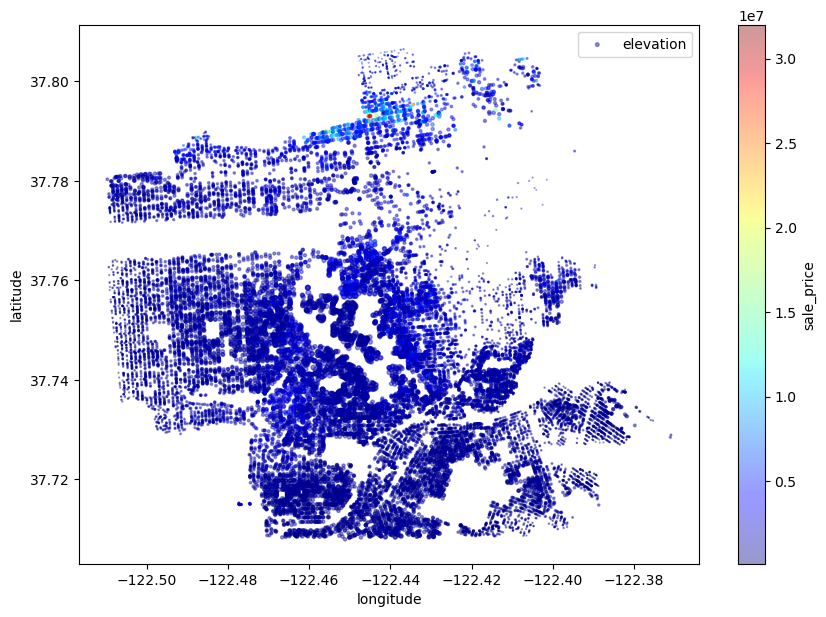

In [11]:
## Heatmap for median_income
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["elevation"]/60, label="elevation", figsize=(10,7),
    c="sale_price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

### 2. Data processing

We need to drop some data which is redundant and not needed in our analysis

In [12]:
df.columns

Index(['longitude', 'latitude', 'elevation', 'full_address', 'city', 'state',
       'street_no', 'street_name', 'street_suffix', 'zip', 'area',
       'district_no', 'district_desc', 'subdist_no', 'subdist_desc',
       'on_market_date', 'cdom', 'orig_list_price', 'sale_date', 'sale_price',
       'rooms', 'baths', 'beds', 'lot_acres', 'lot_sf', 'year_built',
       'num_parking'],
      dtype='object')

In [13]:
df.drop(['full_address', 'city', 'state', 'street_no', 'street_name', 'street_suffix', 'district_no', 'district_desc'], \
        axis=1, inplace = True)

In [14]:
df.head()

,longitude,latitude,elevation,zip,area,subdist_no,subdist_desc,on_market_date,cdom,orig_list_price,sale_date,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
0,-122.50965,37.780280,200.83,94121,1050,1050,1 - Outer Richmond,3/14/2013,4,1095000,3/22/2013,1260000,8,3.5,4,NaN,0,1969,2
1,-122.50929,37.762608,23.21,94122,2030,2030,2 - Outer Sunset,12/3/2015,144,1250000,4/25/2016,1075000,9,3.0,4,0.0689,3000,1947,1
2,-122.50929,37.762608,23.21,94122,2030,2030,2 - Outer Sunset,5/18/2017,36,1395000,8/17/2017,1525000,9,5.0,5,0.0689,3000,1947,1
3,-122.50924,37.777330,189.11,94121,1050,1050,1 - Outer Richmond,6/27/2010,42,725000,8/20/2010,715000,5,1.0,2,NaN,0,1939,2
4,-122.50919,37.776695,175.89,94121,1050,1050,1 - Outer Richmond,6/7/2012,24,1595000,7/13/2012,1595000,8,4.0,4,NaN,0,1951,3


We also noticed that, 'area' and 'subdist_no' have same value

In [15]:
(df['area'] == df['subdist_no']).values

array([ True,  True,  True, ...,  True,  True,  True])

In [16]:
False in (df['area'] == df['subdist_no']).values

False

And actually those columns refer to the regional location of the house inside SF city.

In [17]:
df['subdist_desc'].unique()

array(['1 - Outer Richmond', '2 - Outer Sunset', '2 - Outer Parkside',
       '3 - Lake Shore', '2 - Central Sunset', '2 - Parkside',
       '3 - Pine Lake Park', '1 - Sea Cliff', '1 - Central Richmond',
       '1 - Lake Street', '3 - Merced Manor', '3 - Stonestown',
       '2 - Inner Sunset', '2 - Inner Parkside', '3 - Lakeside',
       '2 - Golden Gate Heights', '4 - West Portal',
       '4 - Ingleside Terrace', '3 - Merced Heights',
       '3 - Ingleside Heights', '1 - Inner Richmond',
       '4 - Balboa Terrace', '4 - St. Francis Wood', '4 - Forest Hill',
       '10 - Outer Mission', '4 - Mount Davidson Manor',
       '4 - Monterey Heights', '7 - Presidio Heights',
       '4 - Forest Hill Extensio', '3 - Oceanview', '3 - Ingleside',
       '4 - Forest Knolls', '4 - Westwood Park', '4 - Sherwood Forest',
       '4 - Miraloma Park', '4 - Westwood Highlands', '1 - Lone Mountain',
       '1 - Jordan Park/Laurel H', '5 - Cole Valley/Parnassu',
       '4 - Midtown Terrace', '4 - Sunnysid

![avatar](https://ontheworldmap.com/usa/city/san-francisco/map-of-san-francisco.jpg)

##### Currently we don't need to consider attributes like on_market_date, cdom, sale_date. Those features can represent the market preference and evaluation for certain houses. 

<font color=red> ***After-class excercise: include cdom or other metrics related to sales speed in model***</font>

In [18]:
df.drop(['area', 'subdist_no', 'zip', 'on_market_date', 'cdom', 'sale_date', 'lot_acres', 'orig_list_price'], axis=1, inplace = True)

In [19]:
df

,longitude,latitude,elevation,subdist_desc,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
0,-122.50965,37.780280,200.83,1 - Outer Richmond,1260000,8,3.5,4,0,1969,2
1,-122.50929,37.762608,23.21,2 - Outer Sunset,1075000,9,3.0,4,3000,1947,1
2,-122.50929,37.762608,23.21,2 - Outer Sunset,1525000,9,5.0,5,3000,1947,1
3,-122.50924,37.777330,189.11,1 - Outer Richmond,715000,5,1.0,2,0,1939,2
4,-122.50919,37.776695,175.89,1 - Outer Richmond,1595000,8,4.0,4,0,1951,3
...,...,...,...,...,...,...,...,...,...,...,...
23706,NaN,NaN,NaN,1 - Lone Mountain,1300000,6,1.5,3,0,1905,1
23707,NaN,NaN,NaN,10 - Bayview,210000,5,1.0,2,0,1907,1
23708,NaN,NaN,NaN,4 - Forest Knolls,775000,6,2.5,3,0,1960,3
23709,NaN,NaN,NaN,4 - Forest Knolls,830000,6,2.0,3,0,1960,2


For simplicity, here we only consider houses with positive square feet/acres area.

In [20]:
df = df[df['lot_sf'] > 0]
df

,longitude,latitude,elevation,subdist_desc,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
1,-122.50929,37.762608,23.21,2 - Outer Sunset,1075000,9,3.0,4,3000,1947,1
2,-122.50929,37.762608,23.21,2 - Outer Sunset,1525000,9,5.0,5,3000,1947,1
5,-122.50919,37.776695,175.89,1 - Outer Richmond,3310000,8,4.0,4,3959,1951,3
7,-122.50909,37.759580,23.45,2 - Outer Sunset,1304000,0,2.0,3,2639,1900,1
8,-122.50908,37.759480,23.57,2 - Outer Sunset,1303000,5,2.0,3,2996,1900,1
...,...,...,...,...,...,...,...,...,...,...,...
23698,NaN,NaN,NaN,10 - Bayview,750000,0,1.0,3,2495,1924,1
23699,NaN,NaN,NaN,10 - Bayview,700000,6,1.5,3,2495,1939,2
23700,NaN,NaN,NaN,9 - Potrero Hill,1100000,10,2.0,4,2500,0,0
23702,NaN,NaN,NaN,10 - Excelsior,935000,7,2.0,3,2495,1948,1


In [21]:
df.describe()

,longitude,latitude,elevation,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
count,10126.000000,10126.000000,10126.000000,1.030700e+04,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000
mean,-122.448406,37.744754,250.973007,1.638325e+06,5.001552,2.120379,3.052392,2858.308625,1867.468128,1.502668
std,0.031510,0.021616,150.888372,1.317722e+06,3.199887,1.085178,1.049045,1125.793250,348.791788,0.786350
min,-122.509290,37.708320,10.090000,2.720700e+05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,-122.471647,37.729646,141.887500,9.500000e+05,4.000000,1.000000,2.000000,2374.000000,1913.000000,1.000000
50%,-122.446060,37.741736,229.710000,1.310000e+06,6.000000,2.000000,3.000000,2650.000000,1928.000000,1.000000
75%,-122.426220,37.757056,331.585000,1.838000e+06,7.000000,3.000000,4.000000,3014.000000,1946.000000,2.000000
max,-122.375885,37.806440,825.500000,3.200000e+07,25.000000,11.000000,14.000000,28788.000000,2018.000000,7.000000


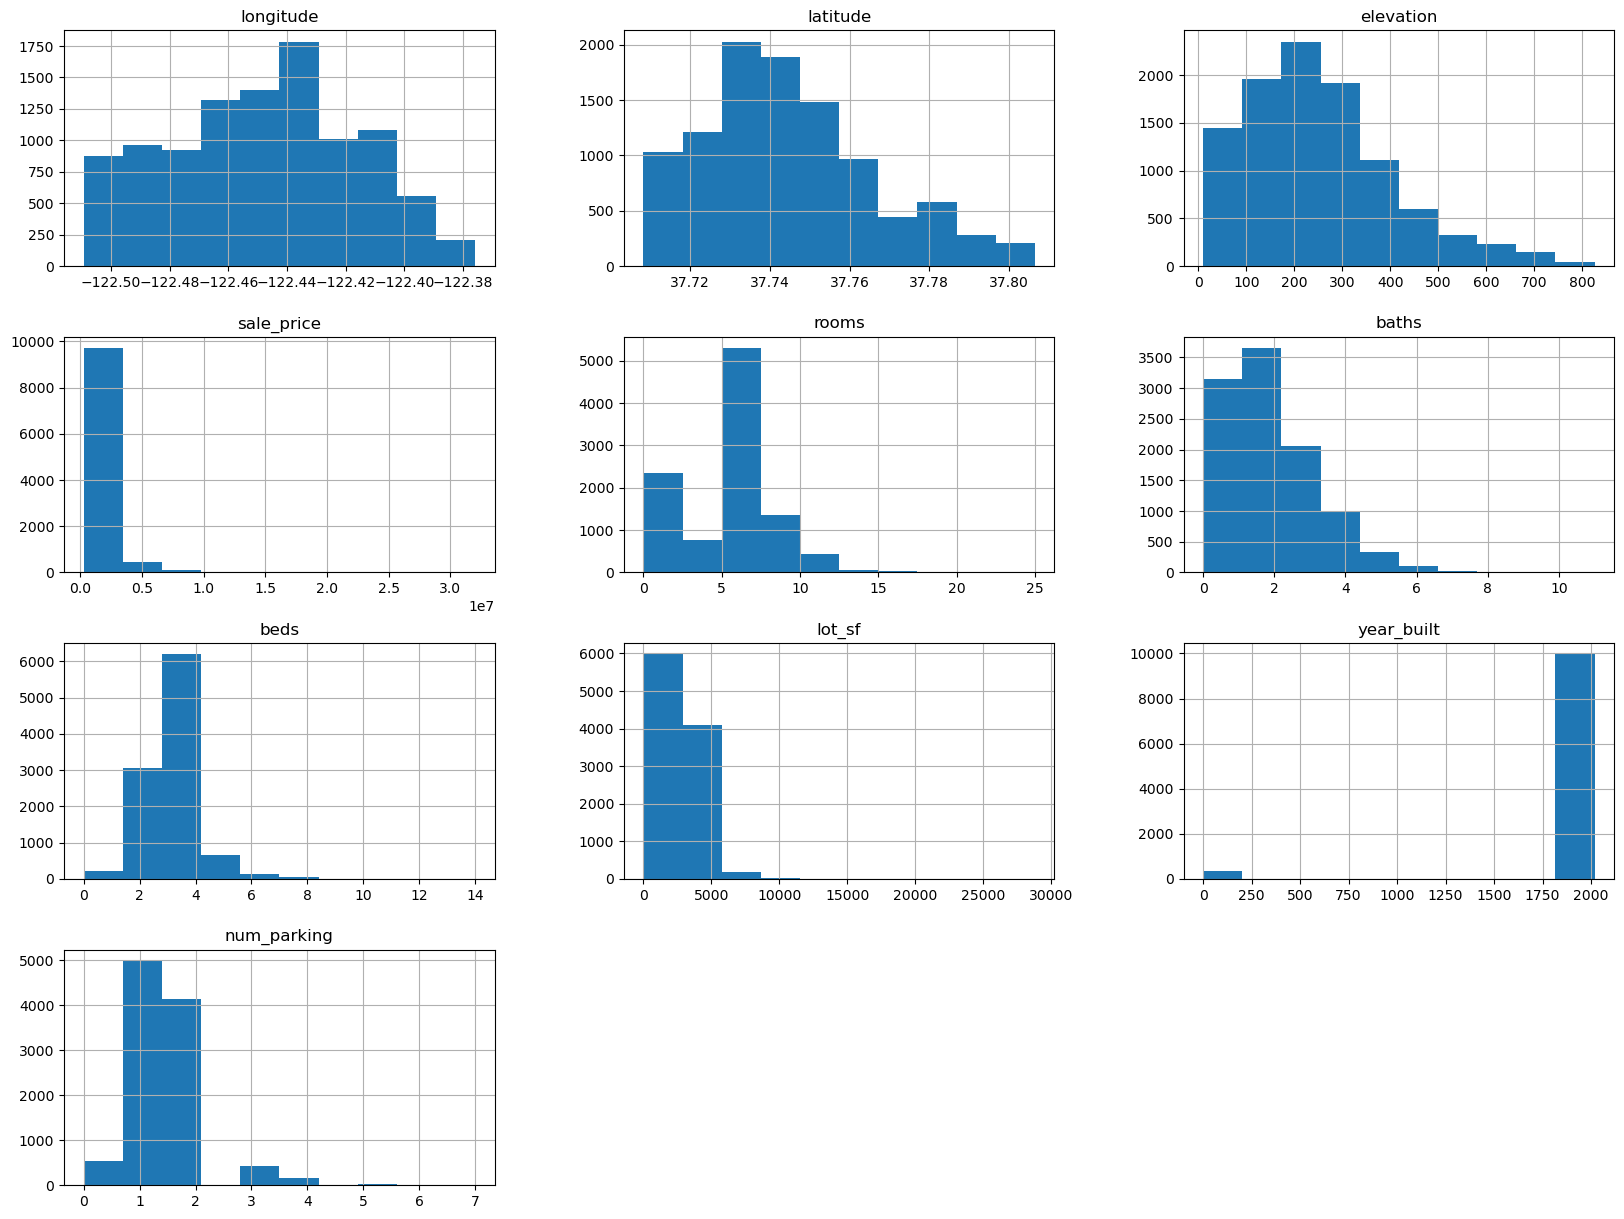

In [22]:
df.hist(figsize=(20,15))
plt.show()

We need to look at some features more granularly:

<Axes: >

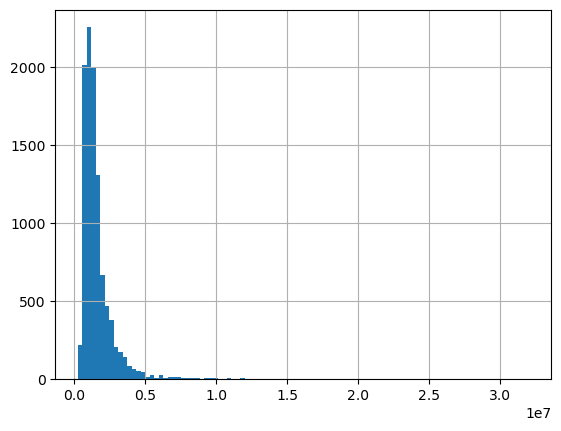

In [23]:
df['sale_price'].hist(bins=100)

In [24]:
df[df['sale_price'] == df['sale_price'].min()]

,longitude,latitude,elevation,subdist_desc,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
23210,-122.38213,37.737465,62.48,10 - Bayview,272070,5,2.0,2,1024,1992,1


In [25]:
df[df['sale_price'] == df['sale_price'].max()]

,longitude,latitude,elevation,subdist_desc,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
11652,-122.44497,37.793003,326.19,7 - Pacific Heights,32000000,0,6.0,5,5497,1924,0


In [26]:
df[df['year_built'] == df['year_built'].min()]

,longitude,latitude,elevation,subdist_desc,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
50,-122.50831,37.763880,32.26,2 - Outer Sunset,685000,0,2.00,3,1438,0,1
115,-122.50775,37.755940,27.24,2 - Outer Sunset,1035000,0,3.00,5,2996,0,2
148,-122.50744,37.751217,25.46,2 - Outer Sunset,715000,0,1.00,2,1100,0,1
191,-122.50715,37.778020,240.02,1 - Outer Richmond,665000,5,1.00,2,644,0,0
255,-122.50672,37.772010,55.59,1 - Outer Richmond,1035000,0,1.00,2,2996,0,1
...,...,...,...,...,...,...,...,...,...,...,...
23591,NaN,NaN,NaN,6 - Lower Pacific Height,1488000,0,4.50,4,2101,0,0
23640,NaN,NaN,NaN,5 - Cole Valley/Parnassu,1550000,0,1.00,1,2988,0,2
23663,NaN,NaN,NaN,4 - Monterey Heights,1607000,0,1.25,3,4875,0,2
23686,NaN,NaN,NaN,4 - Forest Hill Extensio,1386000,0,2.00,3,3158,0,2


Seems like some of the houses are missing year_built data. We can either dispose those data points or fill them.
Here I will just drop them, and leave another way as excercise

<font color=red> ***After-class excercise: fill year_built with mean data***</font>

In [28]:
df['year_built'].median()

1928.0

In [29]:
df.loc[df['year_built'] == 0, 'year_built'] = df['year_built'].median()
df = df[df['year_built'] > 0 ]

In [30]:
df[df['year_built'] == df['year_built'].min()]

,longitude,latitude,elevation,subdist_desc,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
22749,-122.389366,37.734035,94.34,10 - Bayview,950000,7,1.0,3,5000,1852,3


In [31]:
df['HouseAge'] = 2023 - df['year_built']
# df.drop(['year_built'], axis=1, inplace= True)
df

,longitude,latitude,elevation,subdist_desc,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking,HouseAge
1,-122.50929,37.762608,23.21,2 - Outer Sunset,1075000,9,3.0,4,3000,1947,1,76
2,-122.50929,37.762608,23.21,2 - Outer Sunset,1525000,9,5.0,5,3000,1947,1,76
5,-122.50919,37.776695,175.89,1 - Outer Richmond,3310000,8,4.0,4,3959,1951,3,72
7,-122.50909,37.759580,23.45,2 - Outer Sunset,1304000,0,2.0,3,2639,1900,1,123
8,-122.50908,37.759480,23.57,2 - Outer Sunset,1303000,5,2.0,3,2996,1900,1,123
...,...,...,...,...,...,...,...,...,...,...,...,...
23698,NaN,NaN,NaN,10 - Bayview,750000,0,1.0,3,2495,1924,1,99
23699,NaN,NaN,NaN,10 - Bayview,700000,6,1.5,3,2495,1939,2,84
23700,NaN,NaN,NaN,9 - Potrero Hill,1100000,10,2.0,4,2500,1928,0,95
23702,NaN,NaN,NaN,10 - Excelsior,935000,7,2.0,3,2495,1948,1,75


<Axes: >

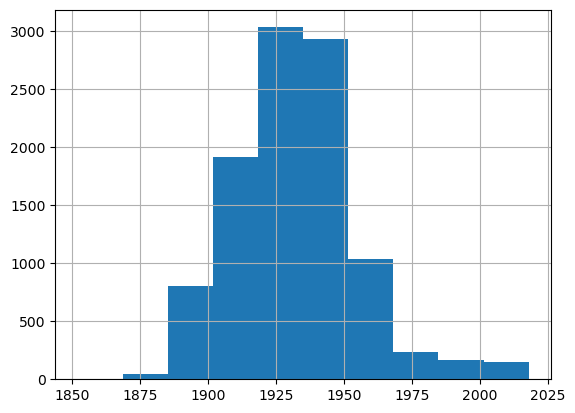

In [32]:
df['year_built'].hist()

In [33]:
df

,longitude,latitude,elevation,subdist_desc,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking,HouseAge
1,-122.50929,37.762608,23.21,2 - Outer Sunset,1075000,9,3.0,4,3000,1947,1,76
2,-122.50929,37.762608,23.21,2 - Outer Sunset,1525000,9,5.0,5,3000,1947,1,76
5,-122.50919,37.776695,175.89,1 - Outer Richmond,3310000,8,4.0,4,3959,1951,3,72
7,-122.50909,37.759580,23.45,2 - Outer Sunset,1304000,0,2.0,3,2639,1900,1,123
8,-122.50908,37.759480,23.57,2 - Outer Sunset,1303000,5,2.0,3,2996,1900,1,123
...,...,...,...,...,...,...,...,...,...,...,...,...
23698,NaN,NaN,NaN,10 - Bayview,750000,0,1.0,3,2495,1924,1,99
23699,NaN,NaN,NaN,10 - Bayview,700000,6,1.5,3,2495,1939,2,84
23700,NaN,NaN,NaN,9 - Potrero Hill,1100000,10,2.0,4,2500,1928,0,95
23702,NaN,NaN,NaN,10 - Excelsior,935000,7,2.0,3,2495,1948,1,75


##### We can have a look at internal correlations between different features by scatter plotting them:

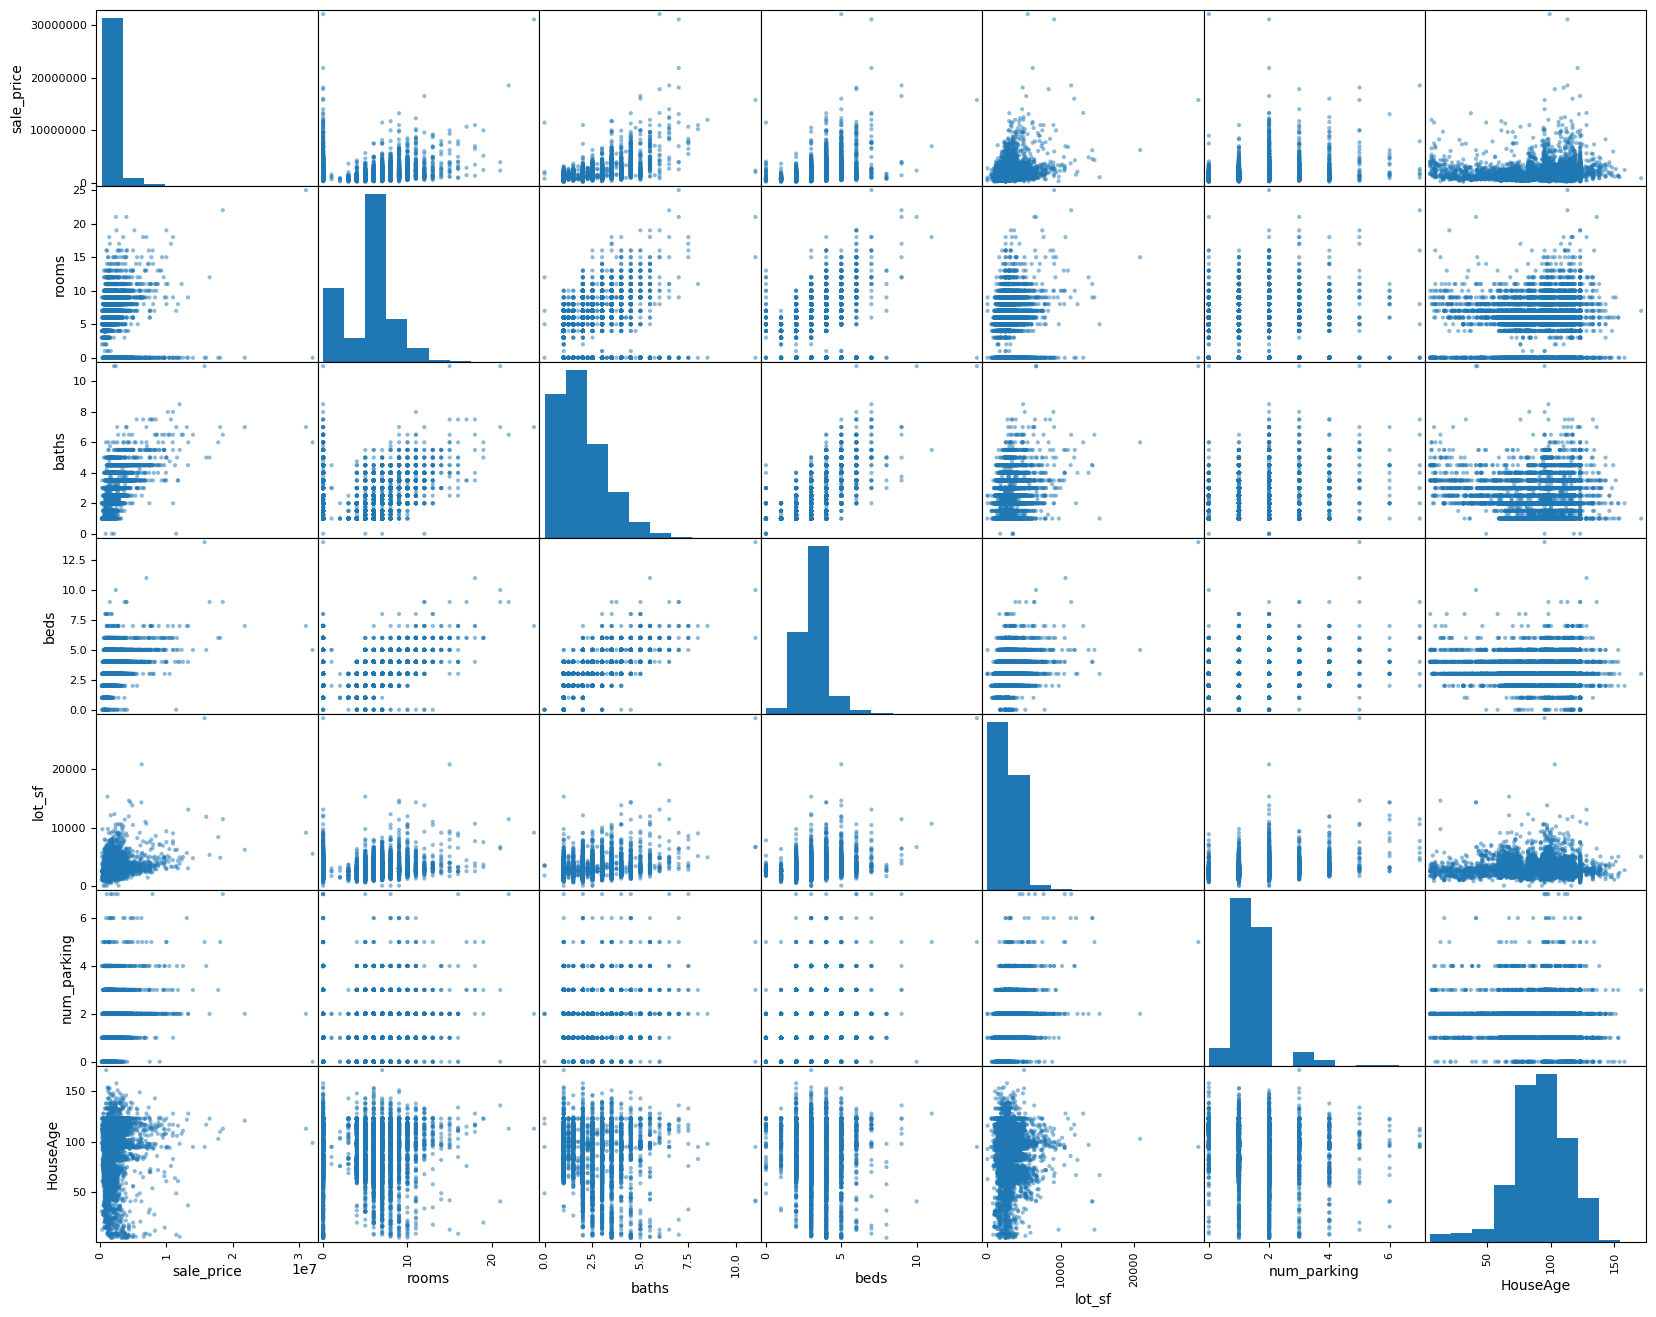

In [34]:
from pandas.plotting import scatter_matrix

attributes = ["sale_price", "rooms", "baths",
              "beds", "lot_sf", "num_parking", "HouseAge"]
scatter_matrix(df[attributes], figsize=(20, 16));

Obviously, we can see some positive correlation between price and lot_sf, baths, rooms, etc.

<Axes: xlabel='sale_price', ylabel='lot_sf'>

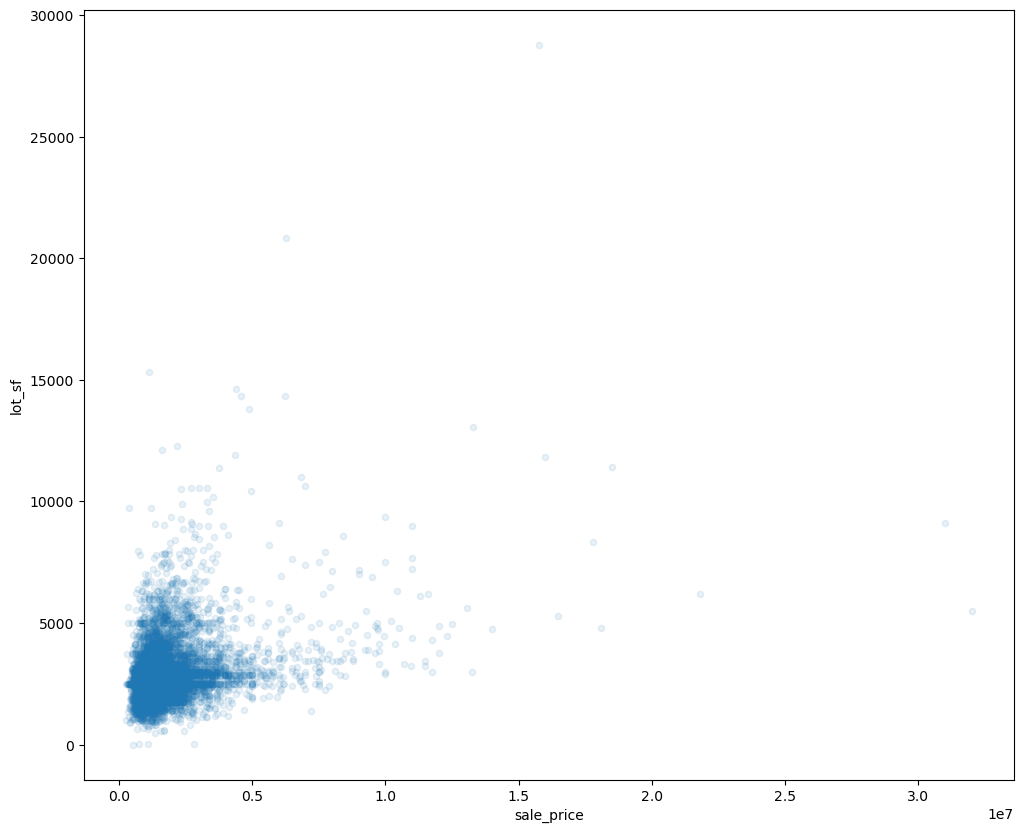

In [35]:
df.plot(kind="scatter", x="sale_price", y="lot_sf",
             alpha=0.1, figsize=(12, 10))

<Axes: xlabel='sale_price', ylabel='baths'>

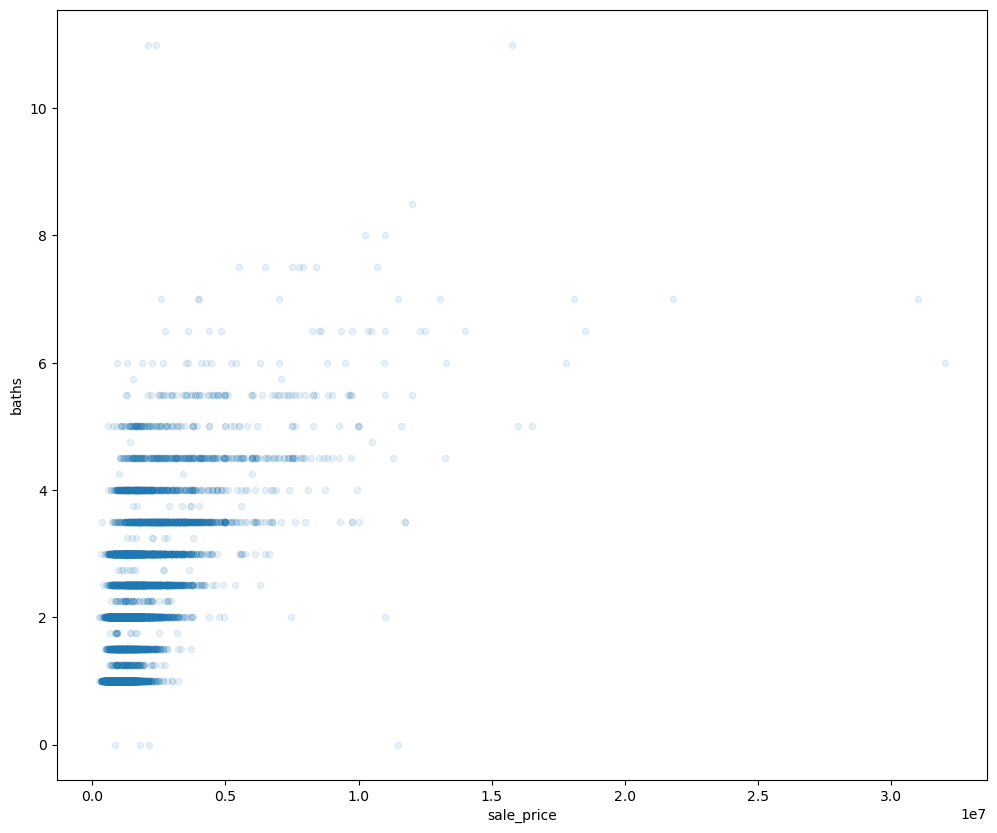

In [36]:
df.plot(kind="scatter", x="sale_price", y="baths",
             alpha=0.1, figsize=(12, 10))

##### We can also have a look at their correlation matrix and then sort the values, need to understand it clearly, not all of them are meaningful:

In [37]:
corr_matrix = df.corr()
corr_matrix

,longitude,latitude,elevation,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking,HouseAge
longitude,1.000000,-0.273649,-0.126373,-0.003463,-0.041296,-0.021027,-0.060125,-0.197504,-0.053072,-0.080796,0.053072
latitude,-0.273649,1.000000,-0.111125,0.531524,0.054004,0.293717,0.200636,0.042710,-0.246598,0.102928,0.246598
elevation,-0.126373,-0.111125,1.000000,0.042662,-0.041067,0.088446,0.059711,0.254464,0.168993,0.066141,-0.168993
sale_price,-0.003463,0.531524,0.042662,1.000000,0.058985,0.602809,0.450868,0.331275,-0.119379,0.251262,0.119379
rooms,-0.041296,0.054004,-0.041067,0.058985,1.000000,0.131502,0.205870,0.093930,-0.047674,0.057571,0.047674
baths,-0.021027,0.293717,0.088446,0.602809,0.131502,1.000000,0.733314,0.284698,0.046636,0.198002,-0.046636
beds,-0.060125,0.200636,0.059711,0.450868,0.205870,0.733314,1.000000,0.284030,0.037748,0.194853,-0.037748
lot_sf,-0.197504,0.042710,0.254464,0.331275,0.093930,0.284698,0.284030,1.000000,0.001163,0.291793,-0.001163
year_built,-0.053072,-0.246598,0.168993,-0.119379,-0.047674,0.046636,0.037748,0.001163,1.000000,0.163497,-1.000000
num_parking,-0.080796,0.102928,0.066141,0.251262,0.057571,0.198002,0.194853,0.291793,0.163497,1.000000,-0.163497


In [38]:
corr_matrix["sale_price"].sort_values(ascending=False)

sale_price     1.000000
baths          0.602809
latitude       0.531524
beds           0.450868
lot_sf         0.331275
num_parking    0.251262
HouseAge       0.119379
rooms          0.058985
elevation      0.042662
longitude     -0.003463
year_built    -0.119379
Name: sale_price, dtype: float64

Can you try to explain all of those relationships?

#### Use sklearn transformation pipelines

In [39]:
df = pd.read_csv('Sales.csv')
df.drop(['full_address', 'city', 'state', 'street_no', 'street_name', 'street_suffix', 'district_no', 'district_desc', 'area', 'subdist_no', 'zip', 'on_market_date', 'cdom', 'sale_date', 'lot_acres', 'orig_list_price'], \
        axis=1, inplace = True)

## numerical values
_df_nums = df[['longitude', 'latitude', 'elevation',  'sale_price',
       'rooms', 'baths', 'beds', 'lot_sf', 'year_built','num_parking']].copy()

In [40]:
_df_nums

,longitude,latitude,elevation,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
0,-122.50965,37.780280,200.83,1260000,8,3.5,4,0,1969,2
1,-122.50929,37.762608,23.21,1075000,9,3.0,4,3000,1947,1
2,-122.50929,37.762608,23.21,1525000,9,5.0,5,3000,1947,1
3,-122.50924,37.777330,189.11,715000,5,1.0,2,0,1939,2
4,-122.50919,37.776695,175.89,1595000,8,4.0,4,0,1951,3
...,...,...,...,...,...,...,...,...,...,...
23706,NaN,NaN,NaN,1300000,6,1.5,3,0,1905,1
23707,NaN,NaN,NaN,210000,5,1.0,2,0,1907,1
23708,NaN,NaN,NaN,775000,6,2.5,3,0,1960,3
23709,NaN,NaN,NaN,830000,6,2.0,3,0,1960,2


In [41]:
from sklearn.impute import SimpleImputer
# Create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='median')
# Fit the imputer on the training data
imputer.fit(_df_nums)
_X = imputer.transform(_df_nums)

In [42]:
_X

array([[-1.2250965e+02,  3.7780280e+01,  2.0083000e+02, ...,
         0.0000000e+00,  1.9690000e+03,  2.0000000e+00],
       [-1.2250929e+02,  3.7762608e+01,  2.3210000e+01, ...,
         3.0000000e+03,  1.9470000e+03,  1.0000000e+00],
       [-1.2250929e+02,  3.7762608e+01,  2.3210000e+01, ...,
         3.0000000e+03,  1.9470000e+03,  1.0000000e+00],
       ...,
       [-1.2244505e+02,  3.7741936e+01,  2.2770000e+02, ...,
         0.0000000e+00,  1.9600000e+03,  3.0000000e+00],
       [-1.2244505e+02,  3.7741936e+01,  2.2770000e+02, ...,
         0.0000000e+00,  1.9600000e+03,  2.0000000e+00],
       [-1.2244505e+02,  3.7741936e+01,  2.2770000e+02, ...,
         0.0000000e+00,  1.9600000e+03,  2.0000000e+00]])

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin


class HouseAgeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, year_col_num=-2, lot_sf_col_num=-3, current_year = 2023):
        self.year_col_num = year_col_num
        self.lot_sf_col_num = lot_sf_col_num
        self.current_year = current_year
        
    
    def fit(self, X, y=None):
        return self  
    
    def transform(self, X):
        X[:, self.year_col_num] = self.current_year - X[:, self.year_col_num]
        _mask = X[:, self.lot_sf_col_num] > 0
        X = X[_mask,:]
        return X


In [44]:
age_adder = HouseAgeAdder(year_col_num=-2,  lot_sf_col_num=-3, current_year=2023)
age_adder.transform(_df_nums.values)

array([[-1.2250929e+02,  3.7762608e+01,  2.3210000e+01, ...,
         3.0000000e+03,  7.6000000e+01,  1.0000000e+00],
       [-1.2250929e+02,  3.7762608e+01,  2.3210000e+01, ...,
         3.0000000e+03,  7.6000000e+01,  1.0000000e+00],
       [-1.2250919e+02,  3.7776695e+01,  1.7589000e+02, ...,
         3.9590000e+03,  7.2000000e+01,  3.0000000e+00],
       ...,
       [           nan,            nan,            nan, ...,
         2.5000000e+03,  2.0230000e+03,  0.0000000e+00],
       [           nan,            nan,            nan, ...,
         2.4950000e+03,  7.5000000e+01,  1.0000000e+00],
       [           nan,            nan,            nan, ...,
         1.9800000e+03,  1.1800000e+02,  0.0000000e+00]])

In [45]:
df_nums = pd.DataFrame(data = age_adder.transform(imputer.transform(_df_nums.values)), columns = _df_nums.columns).rename(columns = {'year_built':'HouseAge'})
df_nums

,longitude,latitude,elevation,sale_price,rooms,baths,beds,lot_sf,HouseAge,num_parking
0,-122.50929,37.762608,23.21,1075000.0,9.0,3.0,4.0,3000.0,76.0,1.0
1,-122.50929,37.762608,23.21,1525000.0,9.0,5.0,5.0,3000.0,76.0,1.0
2,-122.50919,37.776695,175.89,3310000.0,8.0,4.0,4.0,3959.0,72.0,3.0
3,-122.50909,37.759580,23.45,1304000.0,0.0,2.0,3.0,2639.0,123.0,1.0
4,-122.50908,37.759480,23.57,1303000.0,5.0,2.0,3.0,2996.0,123.0,1.0
...,...,...,...,...,...,...,...,...,...,...
10302,-122.44505,37.741936,227.70,750000.0,0.0,1.0,3.0,2495.0,99.0,1.0
10303,-122.44505,37.741936,227.70,700000.0,6.0,1.5,3.0,2495.0,84.0,2.0
10304,-122.44505,37.741936,227.70,1100000.0,10.0,2.0,4.0,2500.0,2023.0,0.0
10305,-122.44505,37.741936,227.70,935000.0,7.0,2.0,3.0,2495.0,75.0,1.0


We can also use pipeline to concat the processing steps together

In [46]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
        ('imputer', imputer),
        ('age_adder',age_adder),
    ])
num_pipeline.fit_transform(_df_nums.values)

array([[-1.2250929e+02,  3.7762608e+01,  2.3210000e+01, ...,
         3.0000000e+03,  7.6000000e+01,  1.0000000e+00],
       [-1.2250929e+02,  3.7762608e+01,  2.3210000e+01, ...,
         3.0000000e+03,  7.6000000e+01,  1.0000000e+00],
       [-1.2250919e+02,  3.7776695e+01,  1.7589000e+02, ...,
         3.9590000e+03,  7.2000000e+01,  3.0000000e+00],
       ...,
       [-1.2244505e+02,  3.7741936e+01,  2.2770000e+02, ...,
         2.5000000e+03,  2.0230000e+03,  0.0000000e+00],
       [-1.2244505e+02,  3.7741936e+01,  2.2770000e+02, ...,
         2.4950000e+03,  7.5000000e+01,  1.0000000e+00],
       [-1.2244505e+02,  3.7741936e+01,  2.2770000e+02, ...,
         1.9800000e+03,  1.1800000e+02,  0.0000000e+00]])

In [47]:
df_nums = pd.DataFrame(data = num_pipeline.fit_transform(_df_nums.values), columns = _df_nums.columns).rename(columns = {'year_built':'HouseAge'})
df_nums

,longitude,latitude,elevation,sale_price,rooms,baths,beds,lot_sf,HouseAge,num_parking
0,-122.50929,37.762608,23.21,1075000.0,9.0,3.0,4.0,3000.0,76.0,1.0
1,-122.50929,37.762608,23.21,1525000.0,9.0,5.0,5.0,3000.0,76.0,1.0
2,-122.50919,37.776695,175.89,3310000.0,8.0,4.0,4.0,3959.0,72.0,3.0
3,-122.50909,37.759580,23.45,1304000.0,0.0,2.0,3.0,2639.0,123.0,1.0
4,-122.50908,37.759480,23.57,1303000.0,5.0,2.0,3.0,2996.0,123.0,1.0
...,...,...,...,...,...,...,...,...,...,...
10302,-122.44505,37.741936,227.70,750000.0,0.0,1.0,3.0,2495.0,99.0,1.0
10303,-122.44505,37.741936,227.70,700000.0,6.0,1.5,3.0,2495.0,84.0,2.0
10304,-122.44505,37.741936,227.70,1100000.0,10.0,2.0,4.0,2500.0,2023.0,0.0
10305,-122.44505,37.741936,227.70,935000.0,7.0,2.0,3.0,2495.0,75.0,1.0


### 3. Feature engineering 

To be brief, feature engineering is a process which translates some representation that computer or program has difficulty to understand into something easy for them to digest.

Actually the process we translate year_built to HouseAge is already a kind of feature engineering.

We noticed that (longitude, latitude, elevation) can represent location. As common sense, exact location will not matter too much in pricing the houses. What really matters is the relative location or neighbour hood.

In [48]:
df.drop(['longitude', 'latitude',  'elevation'], axis=1, inplace=True)
df = df[df['lot_sf']>0]
df_nums.drop(['longitude', 'latitude',  'elevation'], axis=1, inplace=True)

In [49]:
np.sort(df['subdist_desc'].unique())

array(['1 - Central Richmond', '1 - Inner Richmond',
       '1 - Jordan Park/Laurel H', '1 - Lake Street', '1 - Lone Mountain',
       '1 - Outer Richmond', '1 - Sea Cliff', '10 - Bayview',
       '10 - Bayview Heights', '10 - Candlestick Point',
       '10 - Crocker Amazon', '10 - Excelsior', '10 - Hunters Point',
       '10 - Little Hollywood', '10 - Mission Terrace',
       '10 - Outer Mission', '10 - Portola', '10 - Silver Terrace',
       '10 - Visitacion Valley', '2 - Central Sunset',
       '2 - Golden Gate Heights', '2 - Inner Parkside',
       '2 - Inner Sunset', '2 - Outer Parkside', '2 - Outer Sunset',
       '2 - Parkside', '3 - Ingleside', '3 - Ingleside Heights',
       '3 - Lake Shore', '3 - Lakeside', '3 - Merced Heights',
       '3 - Merced Manor', '3 - Oceanview', '3 - Pine Lake Park',
       '3 - Stonestown', '4 - Balboa Terrace', '4 - Diamond Heights',
       '4 - Forest Hill', '4 - Forest Hill Extensio', '4 - Forest Knolls',
       '4 - Ingleside Terrace', '4 - Mid

So in the dataset, we already have tags for different locations. By conducting research on San Francisco map, we find that each number represents a larger area and the following name is a more details area. For simplicity, we will only consider the larger region.

In [50]:
df['subdist_desc'] = df['subdist_desc'].apply(lambda s: s.split()[0])

In [51]:
region_label = df[['subdist_desc']]
region_label

,subdist_desc
1,2
2,2
5,1
7,2
8,2
...,...
23698,10
23699,10
23700,9
23702,10


Since all of them are labeled under numbers, we need to use another way of encoding to eliminate the affect of numerical values.

In [52]:
from sklearn.preprocessing import  OneHotEncoder

In [53]:
cat_encoder = OneHotEncoder(sparse=False)
region_1hot = cat_encoder.fit_transform(region_label)
region_1hot

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [54]:
cat_encoder.categories_

[array(['1', '10', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)]

In [55]:
df.drop(['subdist_desc'], axis=1, inplace=True)
df

,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
1,1075000,9,3.0,4,3000,1947,1
2,1525000,9,5.0,5,3000,1947,1
5,3310000,8,4.0,4,3959,1951,3
7,1304000,0,2.0,3,2639,1900,1
8,1303000,5,2.0,3,2996,1900,1
...,...,...,...,...,...,...,...
23698,750000,0,1.0,3,2495,1924,1
23699,700000,6,1.5,3,2495,1939,2
23700,1100000,10,2.0,4,2500,0,0
23702,935000,7,2.0,3,2495,1948,1


In [56]:
df.values.shape

(10307, 7)

In [57]:
fulldata = np.c_[df_nums.values, region_1hot]

In [58]:
fulldata.shape

(10307, 17)

In [59]:
fulldata

array([[1.075000e+06, 9.000000e+00, 3.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.525000e+06, 9.000000e+00, 5.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.310000e+06, 8.000000e+00, 4.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [1.100000e+06, 1.000000e+01, 2.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [9.350000e+05, 7.000000e+00, 2.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.239988e+06, 7.000000e+00, 1.500000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

### 4. Model training and measurement

#### As regression, base line should be linear regression

In [60]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(fulldata, test_size=0.2, random_state=42)

In [61]:
train_target = train_set[:, 0]
train_target = train_target.reshape(len(train_target),-1)
train_target

array([[ 836000.],
       [1100000.],
       [4050000.],
       ...,
       [ 980000.],
       [ 850000.],
       [1700000.]])

In [62]:
train_features = train_set[:, 1:]
train_features

array([[0. , 1. , 2. , ..., 0. , 0. , 0. ],
       [0. , 1. , 2. , ..., 0. , 0. , 0. ],
       [0. , 3.5, 4. , ..., 0. , 0. , 0. ],
       ...,
       [7. , 2. , 3. , ..., 0. , 0. , 0. ],
       [5. , 1. , 2. , ..., 0. , 0. , 0. ],
       [5. , 1. , 2. , ..., 0. , 0. , 0. ]])

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [65]:
lr = LinearRegression()
lr.fit(train_features,train_target)

LinearRegression()

In [68]:
test_target = test_set[:, 0]
test_target = test_target.reshape(len(test_target),-1)
test_features = test_set[:, 1:]

# Predict on validation set
y_test_pred = lr.predict(test_features)

# Compute and print the mean squared error
mse = mean_squared_error(test_target, y_test_pred)
print("Test set Sqrt MSE: ", np.sqrt(mse))

Test set Sqrt MSE:  683200.8922549939


#### For models with more hyper-parameters, we should use validation set and GridSearchCV to figure out the best settings of the model:

In [69]:
from sklearn.model_selection import train_test_split

y = fulldata[:,0].reshape(len(fulldata),-1)
X = fulldata[:,1:]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [70]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [71]:
# Define the model
model = Ridge()

# Define the hyperparameters to tune
params = {'alpha': [0, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000]}

# Use GridSearchCV to tune hyperparameters
grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters::\n{}".format(grid.best_params_))

Best Hyperparameters::
{'alpha': 1e-07}


In [72]:
# Get the best model
best_model = grid.best_estimator_

# Predict on validation set
y_val_pred = best_model.predict(X_val)

# Compute and print the mean squared error
mse = mean_squared_error(y_val, y_val_pred)
print("Validation Sqrt MSE: ", np.sqrt(mse))

Validation Sqrt MSE:  807978.4157995739


In [73]:
# Predict on validation set
y_test_pred = best_model.predict(X_test)

# Compute and print the mean squared error
mse = mean_squared_error(y_test, y_test_pred)
print("Test Sqrt MSE: ", np.sqrt(mse))

Test Sqrt MSE:  682910.9167523967


<font color=red> ***After-class excercise: Try out tree-based regression model here***</font>

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
# Define the model
model = DecisionTreeRegressor(random_state=0)

# Define the hyperparameters to tune
params = {'max_depth': list(range(1, 11)), 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

# Use GridSearchCV to tune hyperparameters
grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters::\n{}".format(grid.best_params_))



Best Hyperparameters::
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [76]:
# Get the best model
best_model = grid.best_estimator_

# Predict on validation set
y_val_pred = best_model.predict(X_val)

# Compute and print the mean squared error
mse = mean_squared_error(y_val, y_val_pred)
print("Validation Sqrt MSE: ", np.sqrt(mse))

Validation Sqrt MSE:  771728.4424822088


In [77]:
# Predict on validation set
y_test_pred = best_model.predict(X_test)

# Compute and print the mean squared error
mse = mean_squared_error(y_test, y_test_pred)
print("Test Sqrt MSE: ", np.sqrt(mse))

Test Sqrt MSE:  663349.6770637672
